In [289]:
# CASE:We need to develop a predictive model that assesses the claim probability for car insurance policies.
#     OBJECTIVE:-
#         -To understand the factors that influence claim frequency and severity in the period of six months
# #         -Enable insurance companies to better assess risk and determine appropriate premiums for policyholders

#### Importing all necessary libraries

In [291]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 
import seaborn as sns 
sns.set()

In [292]:
# IMPORTED THE DATA

In [293]:
df=pd.read_csv('Insurance_Data.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [294]:
# checking the shape of our dataset
df.shape
# there are 58592 rows and 44 columns

(58592, 44)

In [295]:
# checking all column names
col=df.columns
col

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [296]:
# View of all columns
pd.set_option('display.max_columns', None)
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [298]:
# checking the information of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [299]:
# There are 28 Categorical features and 16 numerical features.

# checking null values

In [300]:
df.isnull().sum()
# Though in info we can see each column has eaqual rows i.e. 58592, still we applied isnull to check, there is no null value present

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

##### Here, we can see there are zero null values

In [301]:
# check the datatypes of each columns
df.dtypes.sort_values()

cylinder                              int64
gross_weight                          int64
height                                int64
width                                 int64
length                                int64
gear_box                              int64
ncap_rating                           int64
displacement                          int64
airbags                               int64
is_claim                              int64
population_density                    int64
make                                  int64
age_of_car                          float64
policy_tenure                       float64
turning_radius                      float64
age_of_policyholder                 float64
is_front_fog_lights                  object
is_rear_window_wiper                 object
is_rear_window_washer                object
max_torque                           object
is_power_door_locks                  object
is_central_locking                   object
is_power_steering               

In [302]:
# description of the numeric data
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [303]:
# description of the categorical data
df.describe(include='O')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,44574,56219,35704,44574,38181,33502,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


In [ ]:
df.head()

In [306]:
# Checking the correlation

round(df.corr(),2)

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
policy_tenure,1.00,0.17,0.14,-0.10,0.09,0.10,0.11,0.19,0.09,-0.02,0.11,0.19,0.19,0.10,0.17,0.19,0.21,0.12,0.14,0.19,0.10,0.10,0.11,0.18,0.23,0.23,0.01,0.19,0.12,0.23,-0.01,0.17,0.08
age_of_car,0.17,1.00,-0.04,-0.06,0.19,0.21,0.23,0.37,0.19,-0.02,0.23,0.39,0.38,0.20,0.33,0.38,0.41,0.26,0.30,0.35,0.21,0.21,0.22,0.35,0.44,0.44,-0.02,0.36,0.19,0.44,-0.05,0.35,-0.03
age_of_policyholder,0.14,-0.04,1.00,0.01,-0.03,-0.01,-0.01,0.01,-0.00,0.03,-0.04,-0.02,0.00,-0.00,-0.02,-0.02,-0.01,-0.05,-0.01,0.01,-0.01,-0.01,-0.03,0.03,-0.04,-0.04,0.02,0.01,0.00,-0.04,0.00,-0.03,0.02
population_density,-0.10,-0.06,0.01,1.00,-0.04,-0.06,-0.06,-0.09,-0.06,-0.01,-0.05,-0.09,-0.09,-0.06,-0.08,-0.09,-0.10,-0.07,-0.08,-0.09,-0.06,-0.06,-0.06,-0.09,-0.10,-0.10,0.00,-0.09,-0.04,-0.10,-0.00,-0.07,-0.02
make,0.09,0.19,-0.03,-0.04,1.00,0.50,0.49,0.43,0.61,-0.04,0.69,0.75,0.41,0.63,0.75,0.69,0.51,0.30,0.48,0.32,0.50,0.50,0.69,0.14,0.41,0.41,0.10,0.35,-0.19,0.41,-0.16,0.79,-0.00
airbags,0.10,0.21,-0.01,-0.06,0.50,1.00,0.94,0.52,0.88,0.13,0.80,0.66,0.48,0.86,0.81,0.81,0.64,0.42,0.83,0.55,1.00,1.00,0.87,0.58,0.41,0.41,0.17,0.55,-0.26,0.41,0.05,0.34,0.00
is_esc,0.11,0.23,-0.01,-0.06,0.49,0.94,1.00,0.52,0.83,0.14,0.85,0.66,0.49,0.84,0.79,0.82,0.65,0.45,0.83,0.55,0.94,0.94,0.92,0.61,0.42,0.42,0.10,0.57,-0.23,0.42,-0.12,0.36,0.00
is_adjustable_steering,0.19,0.37,0.01,-0.09,0.43,0.52,0.52,1.00,0.45,0.25,0.45,0.85,0.96,0.43,0.67,0.82,0.93,0.20,0.57,0.95,0.51,0.51,0.56,0.86,0.77,0.77,0.18,0.93,0.46,0.77,0.10,0.65,0.01
is_tpms,0.09,0.19,-0.00,-0.06,0.61,0.88,0.83,0.45,1.00,0.12,0.70,0.70,0.43,0.98,0.85,0.81,0.59,0.58,0.88,0.48,0.88,0.88,0.76,0.51,0.35,0.35,0.08,0.47,-0.44,0.35,0.04,0.50,0.00
is_parking_sensors,-0.02,-0.02,0.03,-0.01,-0.04,0.13,0.14,0.25,0.12,1.00,-0.26,0.13,0.27,0.12,-0.13,0.08,0.17,0.16,0.22,0.24,0.13,0.13,0.15,0.23,-0.13,-0.13,-0.03,0.24,-0.26,-0.13,-0.02,-0.04,0.01


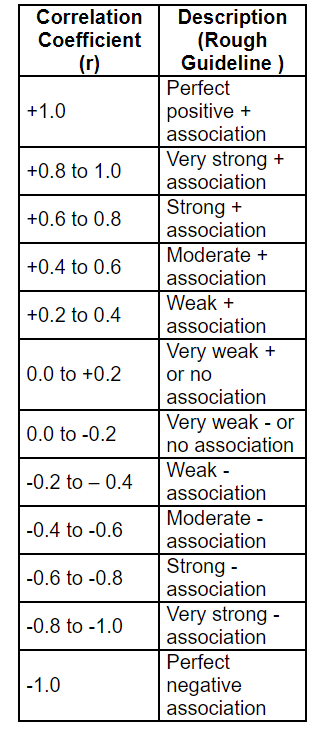

<AxesSubplot:>

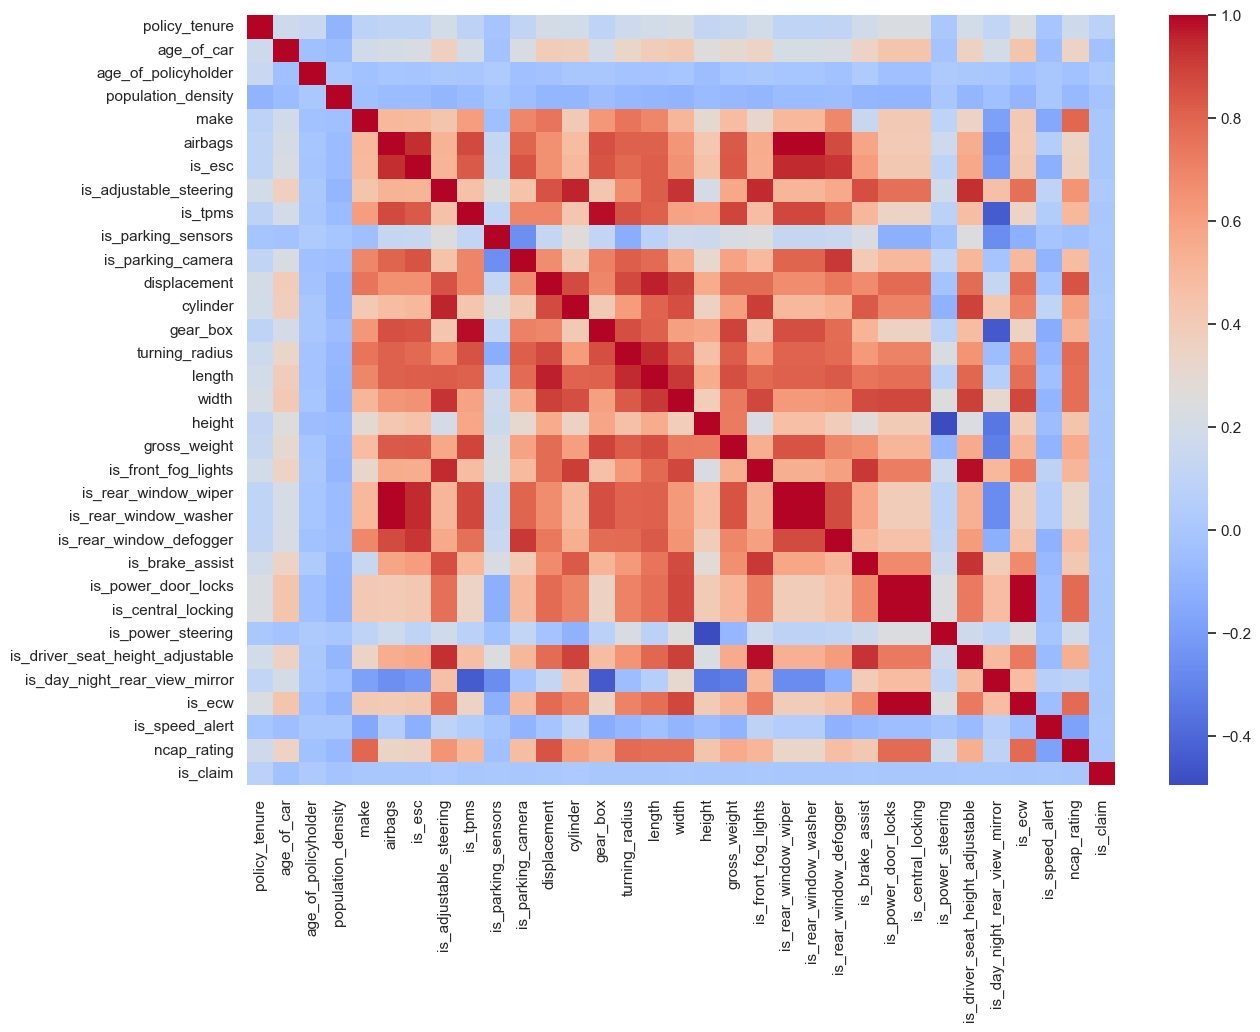

In [308]:

plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), fmt = ".1f", cmap = "coolwarm")

### EDA 

######  Univariate analysis

<AxesSubplot:>

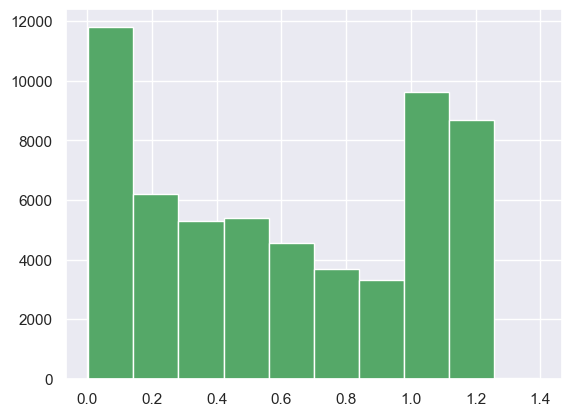

In [311]:
df['policy_tenure'].hist(bins=10,color='g')

#### max policy tenure lies 0-0.2 and 1.1-1.2

<AxesSubplot:xlabel='age_of_car', ylabel='Density'>

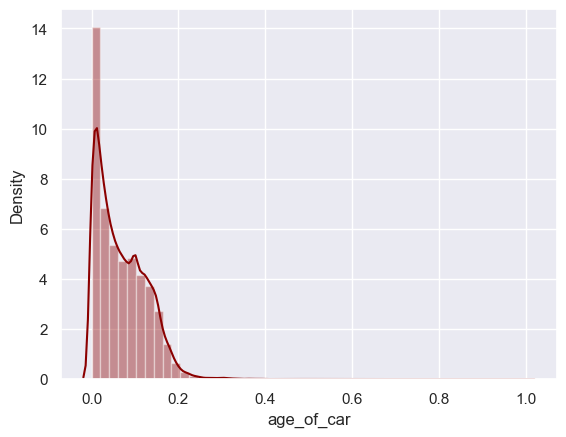

In [313]:
sns.distplot(df['age_of_car'],kde=True,color='darkred',bins=49)

#### 17000 cars are completely new at the time of purchase as 0 age

<AxesSubplot:>

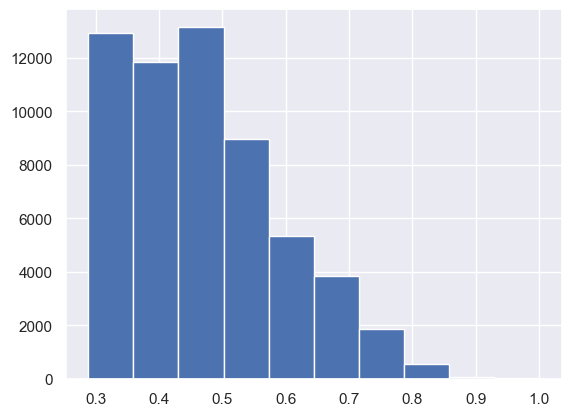

In [315]:
df['age_of_policyholder'].hist()

<AxesSubplot:xlabel='area_cluster', ylabel='count'>

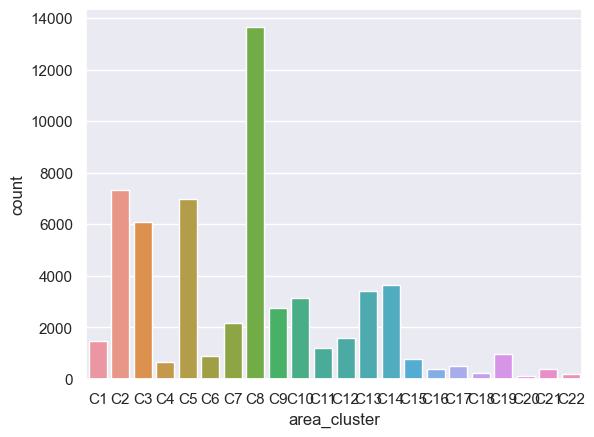

In [316]:
sns.countplot(x='area_cluster',data=df)

#### C8 s the cluster from which maximum area of residence belong,  there the marketing need is not require. C2,C3,C5 should be focused to max the purchase

<AxesSubplot:xlabel='make', ylabel='count'>

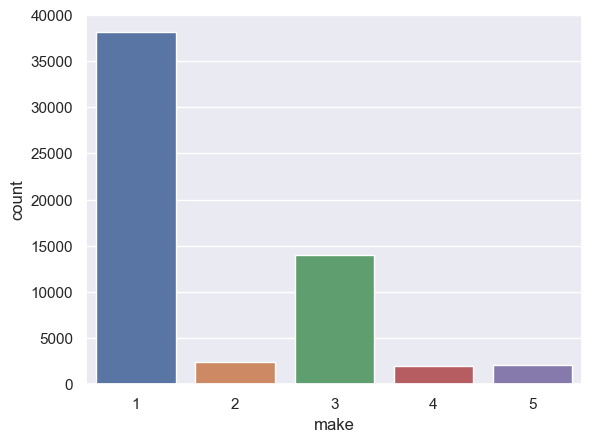

In [318]:
sns.countplot(x='make',data=df)

####  maximum policy belong to manufacture 1; manufacture 3 should be worked upon

<AxesSubplot:xlabel='segment', ylabel='count'>

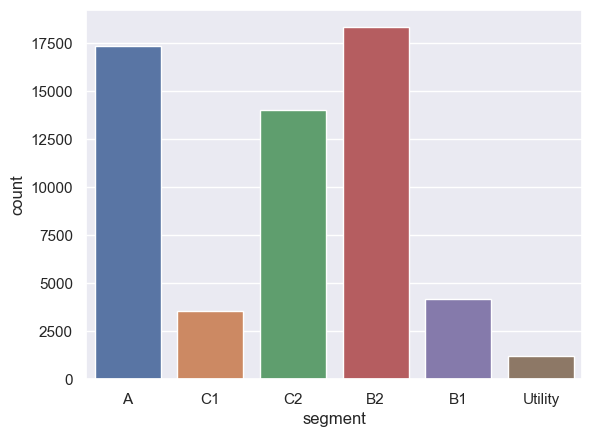

In [320]:
sns.countplot(x='segment',data=df)

#### B2 is the segment to which max Insured car belong, A is providing the cut throat competition

<AxesSubplot:xlabel='ncap_rating', ylabel='count'>

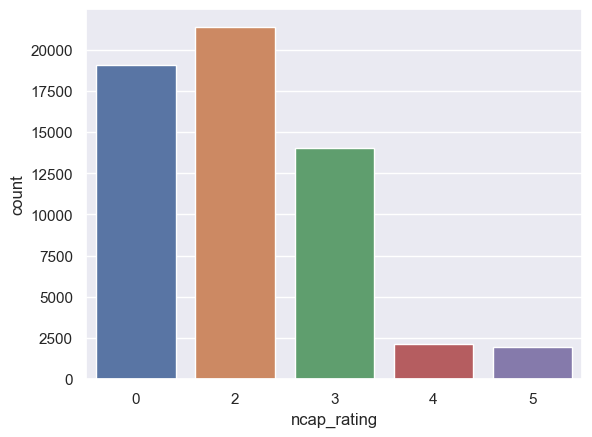

In [322]:
sns.countplot(x='ncap_rating',data=df)

#### Rating 2 was given in terms of safety maximumly, only around 2500 cars got 5 rating

<AxesSubplot:xlabel='model', ylabel='count'>

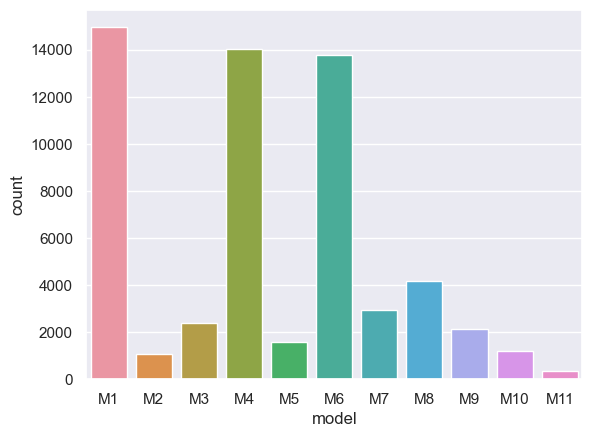

In [324]:
sns.countplot(x='model',data=df)

#### model M1 is popular, M4 and M6 providing cut throat competition, we can also say for M11 policy asked is very low

<AxesSubplot:xlabel='population_density', ylabel='Density'>

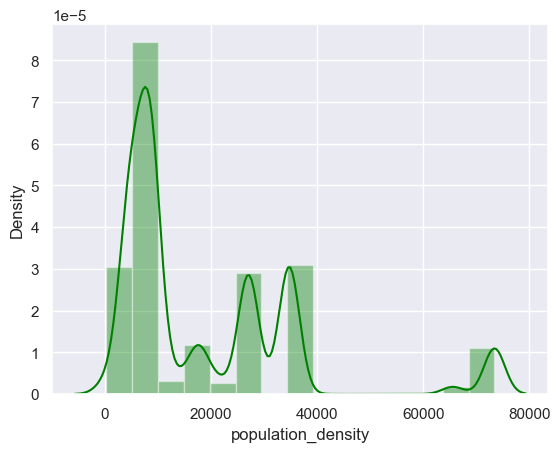

In [326]:
sns.distplot(df['population_density'],color='green',bins=15)

#### max population lies in the range of 0-10000

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

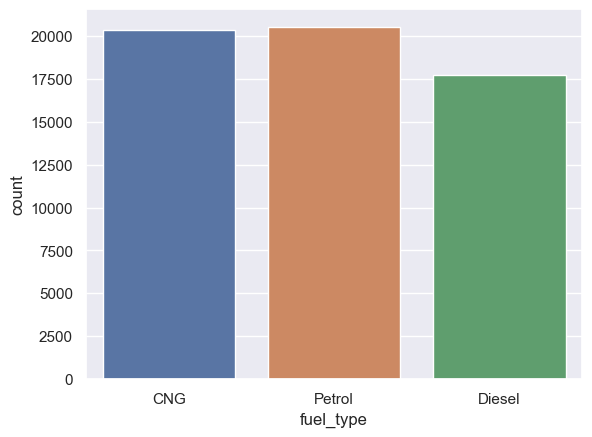

In [328]:
sns.countplot(x='fuel_type',data=df)

#### compare to diesel petrol and cng, i.e. purchase of petrol and cng car via insurance is high compare to diesel car, but also the differnce is not that high

<AxesSubplot:xlabel='airbags', ylabel='count'>

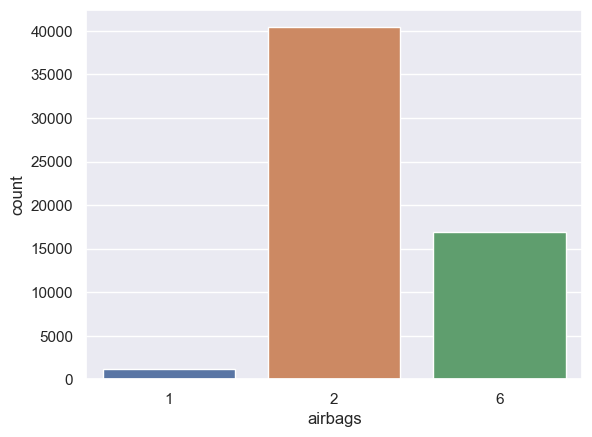

In [330]:
sns.countplot(x='airbags',data=df)

#### clearly car with 2 airbags has high preference, this tells us the consumer prefernce

<AxesSubplot:xlabel='rear_brakes_type', ylabel='count'>

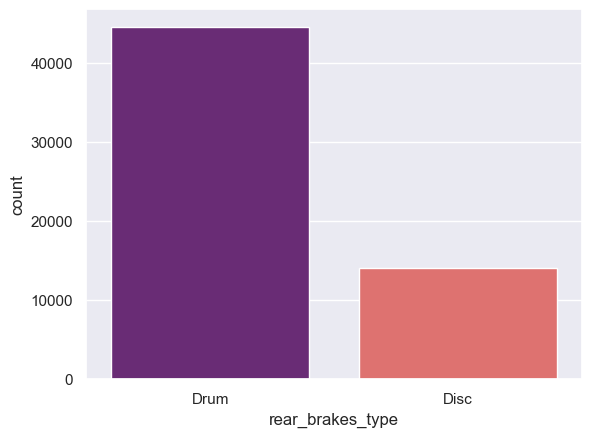

In [332]:
sns.countplot(x='rear_brakes_type',data=df,palette='magma')

#### car with drum rear brakes is the prefernce

<AxesSubplot:xlabel='transmission_type', ylabel='count'>

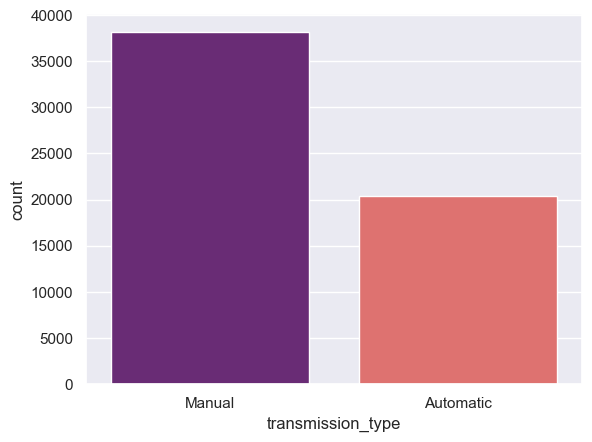

In [334]:
sns.countplot(x='transmission_type',data=df,palette='magma')

#### Preferred manual over automatic

<AxesSubplot:xlabel='steering_type', ylabel='count'>

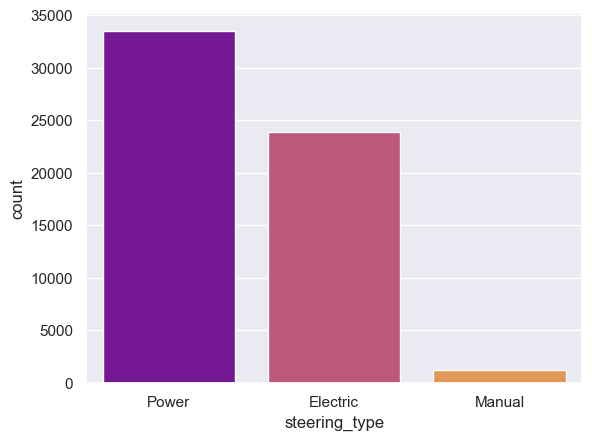

In [336]:
sns.countplot(x='steering_type',data=df,palette='plasma')

#### Power car is most preferred

<AxesSubplot:xlabel='max_torque', ylabel='count'>

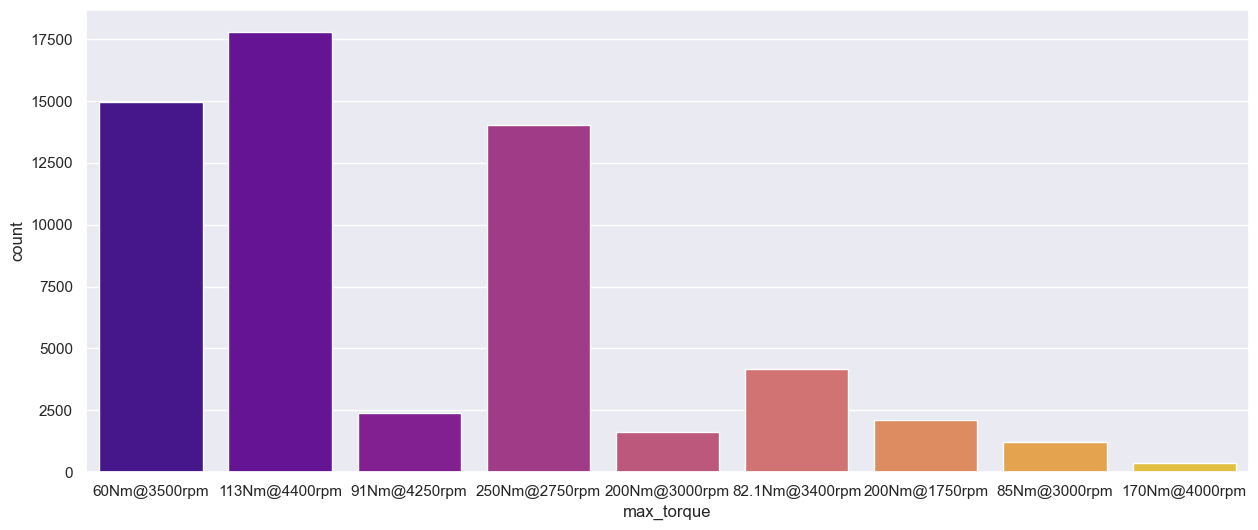

In [338]:

plt.figure(figsize = (15, 6))
sns.countplot(x='max_torque',data=df,palette='plasma')

#### Max_torque output = 113Nm@rpm

<AxesSubplot:xlabel='max_power', ylabel='count'>

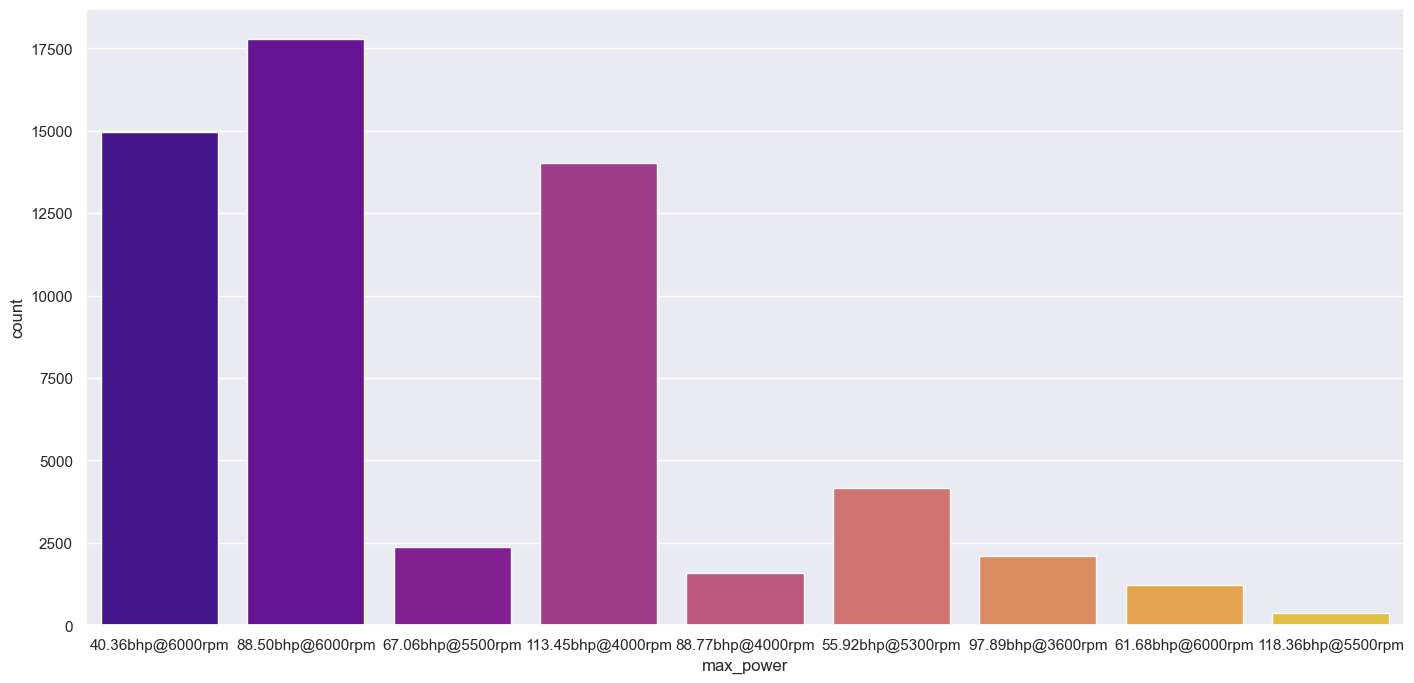

In [340]:

plt.figure(figsize = (17, 8))
sns.countplot(x='max_power',data=df,palette='plasma')

#### Max power output is 88.50bhp@6000rpm

<AxesSubplot:xlabel='engine_type', ylabel='count'>

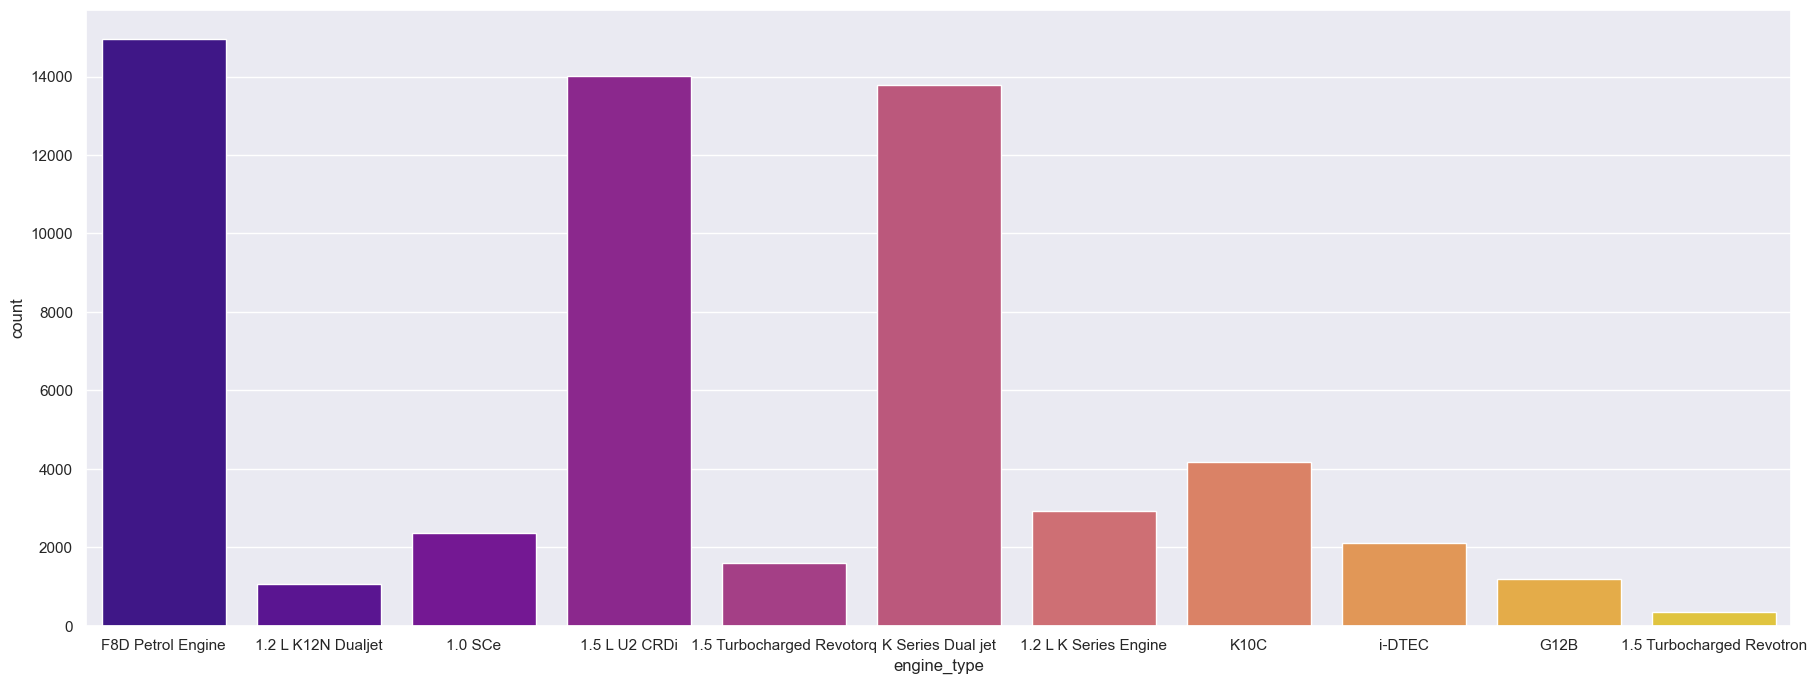

In [342]:

plt.figure(figsize = (22, 8))
sns.countplot(x='engine_type',data=df,palette='plasma')

#### Car with these 3 engines viz; F8D Petrol,1.5L U2 CRDi, K Series Dual jet engine_type opted maximumly

([<matplotlib.patches.Wedge at 0x1cb1c0e6520>,
 [Text(-1.0778627994506613, 0.2195718232387378, 'No Claim'),
  Text(1.077862809729559, -0.2195717727803385, 'Claim')],
 [Text(-0.5879251633367243, 0.11976644903931152, '93.6%'),
  Text(0.5879251689433957, -0.11976642151654825, '6.4%')])

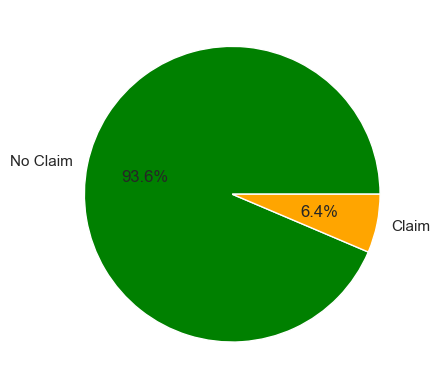

In [346]:
plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],autopct='%1.1f%%')

#### Only 6.4% claim

In [348]:
df['ncap_rating'].value_counts()

2    21402
0    19097
3    14018
4     2114
5     1961
Name: ncap_rating, dtype: int64

([<matplotlib.patches.Wedge at 0x1cb1c23bdc0>,
 [Text(0.4518098332569695, 1.0029296458736823, '2'),
  Text(-1.0827320750093428, -0.19414235433300722, '0'),
  Text(0.41024873004184964, -1.020635086355084, '3'),
  Text(1.0428929270550549, -0.3498204435114395, '4'),
  Text(1.093925089243108, -0.1154465206251731, '5')],
 [Text(0.24644172723107421, 0.5470525341129175, '36.5%'),
  Text(-0.5905811318232779, -0.10589582963618574, '32.6%'),
  Text(0.22377203456828162, -0.556710047102773, '23.9%'),
  Text(0.5688506874845752, -0.1908111510062397, '3.6%'),
  Text(0.5966864123144224, -0.0629708294319126, '3.3%')])

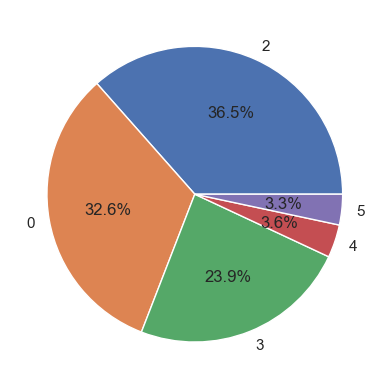

In [349]:
plt.pie(df['ncap_rating'].value_counts(),labels=[2,0,3,4,5],autopct='%1.1f%%')

#### As shown earlier also 2 is the maximum rating provided, also differnce between 2 and 3 rating is just 4%

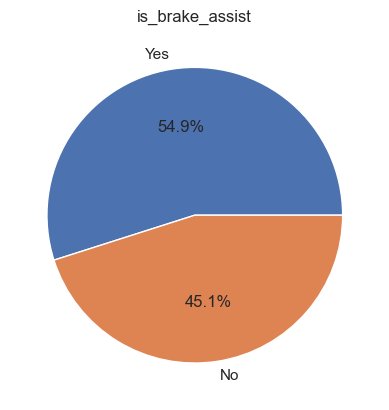

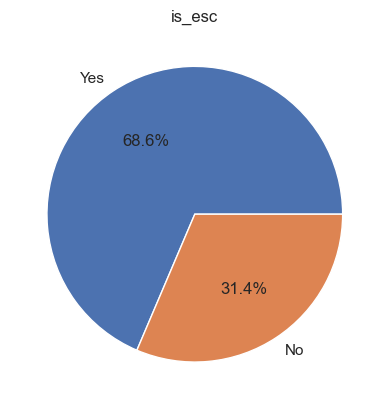

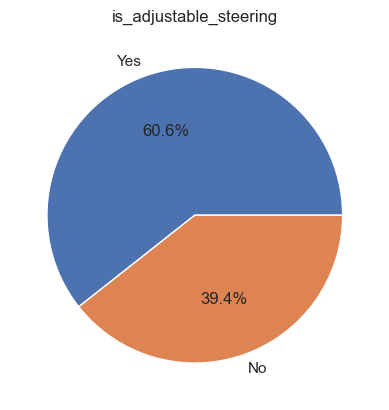

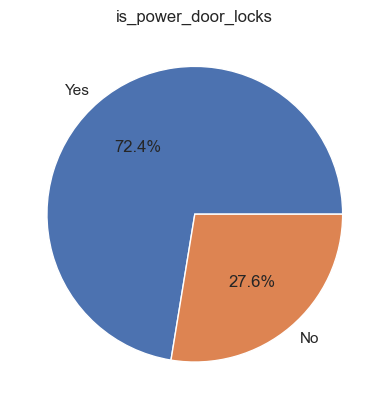

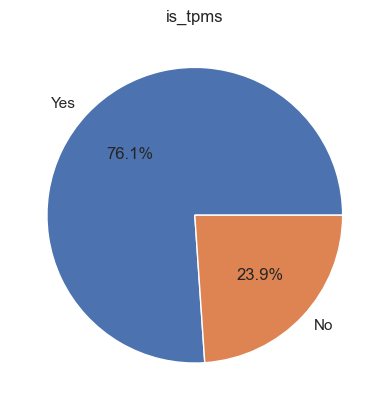

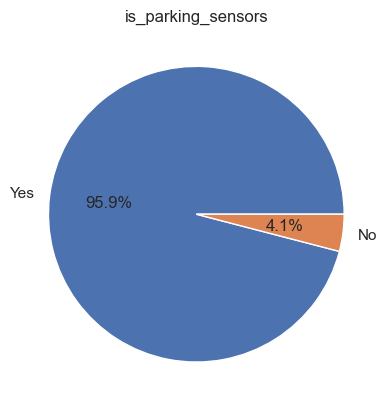

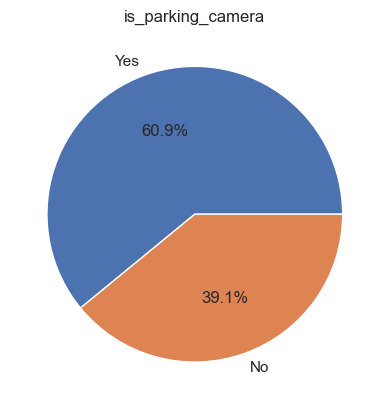

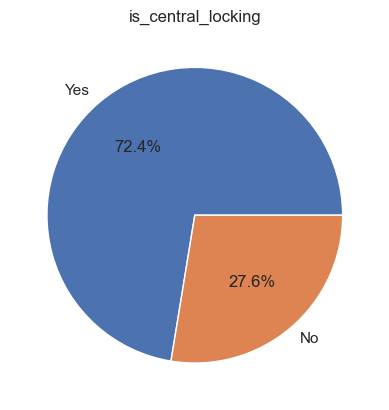

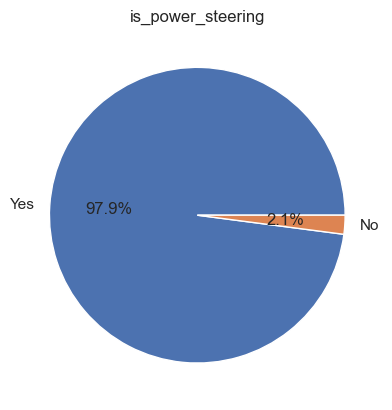

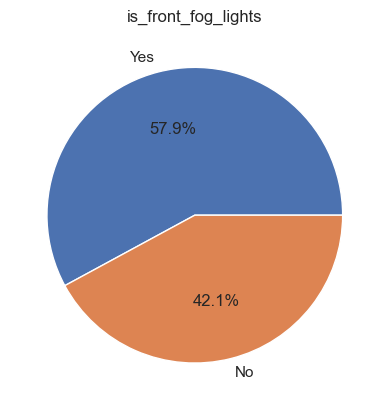

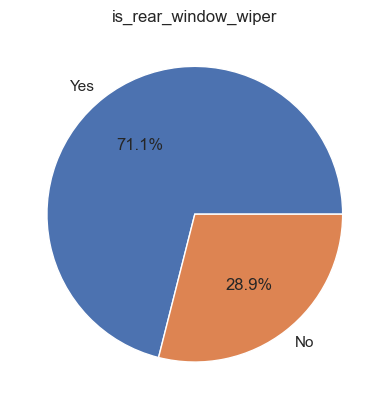

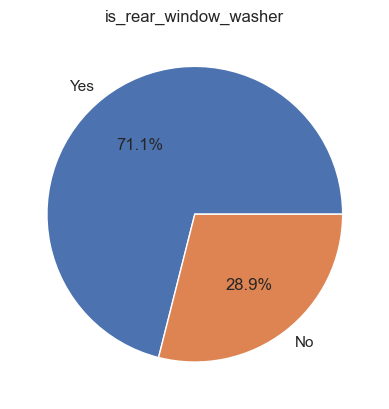

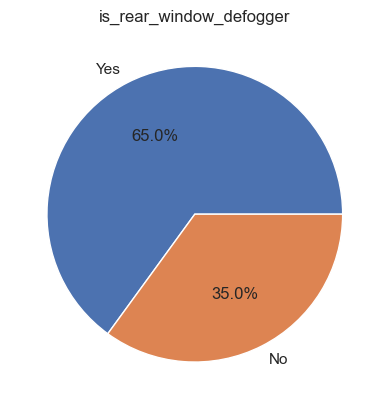

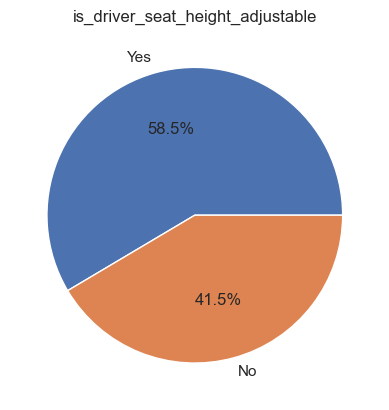

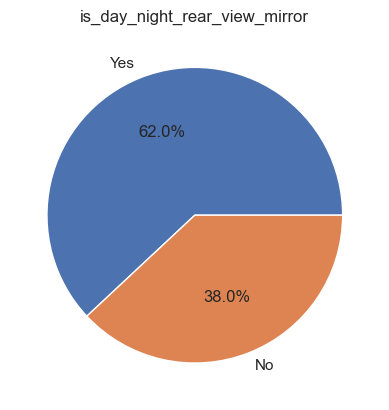

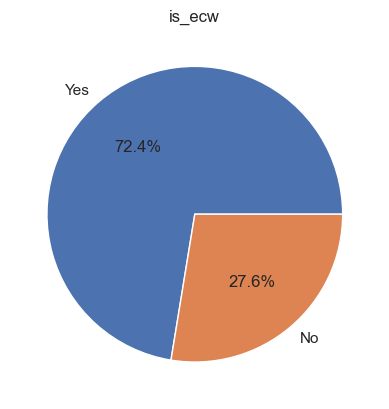

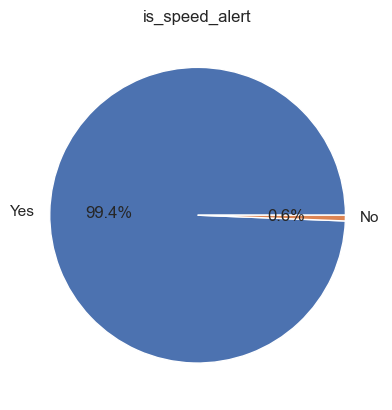

In [351]:
lst = ['is_brake_assist', 'is_esc', 'is_adjustable_steering', 'is_power_door_locks', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'is_central_locking', 'is_power_steering', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']

for i in lst:
    # Create a pie chart for the binary feature
    plt.figure()
    plt.pie(df[i].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
    plt.title(i)
    # Show the pie chart
    plt.show()


 54% car has brake_assist feature
 68.6% cas has electronic stability control (ESC) system (is_esc) -->
 60.6% has adjustable_steering' -->
 72.4% car has power_door_locks,  -->
 70% car has tpms, -->
 95% car has parking_sensors,  -->
 70% car has is_parking_camera, -->
 72.4% car has central_locking,  -->
 97.9% car has is_power_steering,  -->
 57% car has is_front_fog_lights', -->
 71% car has is_rear_window_wiper,  -->
 71% car has is_rear_window_washer, -->
 65% car has is_rear_window_defogger', -->
 58% car has is_driver_seat_height_adjustable,  -->
 62% car has is_day_night_rear_view_mirror, -->
 72% car has is_ecw,  -->
 99% car has is_speed_alert -->

### Converting Categorical Features


#### We'll need to convert categorical features, Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [353]:
df.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0.0,0.0,0.0,1.0,0.0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0.0,0.0,0.0,1.0,0.0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0


In [420]:

lst=['is_brake_assist','is_esc','is_adjustable_steering','is_power_door_locks','is_tpms','is_parking_sensors','is_parking_camera',
     'is_central_locking','is_power_steering','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger',
     'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror',
    'is_ecw','is_speed_alert']
for i in lst:
    df[i] = df[i].replace({'Yes':1, "No":0}).astype('float')

In [355]:
# transmission type
df['transmission_type']=df['transmission_type'].replace({'Manual':1,'Automatic':2,'Electric':3})
df['rear_brakes_type']=df['rear_brakes_type'].replace({'Drum':1,'Disc':0})
# df.drop(columns = ["policy_id"], inplace = True)

In [356]:
# Torque
df[['max_torque_Nm', 'max_torque_rpm']] = df["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))
df.drop(["max_torque"], axis=1, inplace= True)
df['max_torque_Nm'] = df['max_torque_Nm'].str[:-2].astype(float)
df['max_torque_rpm'] = df['max_torque_rpm'].str[:-3].astype(int)

In [357]:
# Power
df[['max_power_bhp', 'max_power_rpm']] = df["max_power"].apply(lambda x: pd.Series(str(x).split("@")))

df['max_power_rpm'] = df['max_power_rpm'].str[:-3].astype(int)
df['max_power_bhp'] = df['max_power_bhp'].str[:-3].astype(float)

In [358]:
df.drop(["max_power"], axis=1, inplace= True)

In [359]:
# steering type
df['steering_type'] = df['steering_type'].replace({'Manual' : 1, 'Power' : 2, 'Electric': 3})

df.head(4)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1.0,1.0,0.0,1.0,1.0,1,1197,4,2,5,3,4.8,3995,1735,1515,1335,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,0,113.0,4400,88.50,6000


In [360]:
#Handling engine_type:
df['engine_type'].value_counts()

F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64

In [392]:

# We have added less impactful values to others list
others=['1.2 L K Series Engine','1.0 SCe','i-DTEC','1.5 Turbocharged Revotorq','G12B','1.2 L K12N Dualjet','1.5 Turbocharged Revotron']
condition=df['engine_type'].isin(others)
df['engine_type']=df['engine_type'].replace({'F8D Petrol Engine':1,'1.5 L U2 CRDi':2,'K Series Dual jet':2,'K10C':3})
df['engine_type'] = df['engine_type'].replace(others, 0)

In [393]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.515874,0.05,0.644231,0,4990,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
1,0.672619,0.02,0.375000,0,27003,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
2,0.841110,0.02,0.384615,1,4076,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
3,0.900277,0.11,0.432692,0,21622,1,0,0,0,0,2,1.0,1.0,0.0,1.0,1.0,1,1197,4,2,5,3,4.8,3995,1735,1515,1335,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,0,113.0,4400,88.50,6000
4,0.596403,0.11,0.634615,2,34738,2,1,0,0,0,2,0.0,0.0,0.0,0.0,1.0,1,999,3,2,5,3,5.0,3731,1579,1490,1155,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2,0,91.0,4250,67.06,5500


In [394]:
df['engine_type']=='1.5 Turbocharged Revotron'

0        False
1        False
2        False
3        False
4        False
         ...  
58587    False
58588    False
58589    False
58590    False
58591    False
Name: engine_type, Length: 58592, dtype: bool

In [395]:
#fuel_type
df['fuel_type']=df['fuel_type'].replace({'Petrol':0,'CNG':1,'Diesel':2})

In [364]:
df['area_cluster'].value_counts()

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

In [365]:
# area_cluster
others_area=['C1','C4','C6','C7','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20','C21','C22']
df['area_cluster']=df['area_cluster'].replace({'C2':0,'C3':1,'C5':2,'C8':3})

condition=df['area_cluster'].isin(others_area)
df['area_cluster'] = df['area_cluster'].replace(others_area, 0)

In [366]:
# Model
others_mod=['M2','M3','M5','M7','M8','M9','M10','M11']
df['model']=df['model'].replace({'M1':0,'M4':1,'M6':2})

condition=df['model'].isin(others_mod)
df['model'] = df['model'].replace(others_mod, 0)

In [367]:
# Segment
others_mod=['C1','B1','Utility']
df['segment']=df['segment'].replace({'C2':1,'A':1,'B2':2})

condition=df['segment'].isin(others_mod)
df['segment'] = df['segment'].replace(others_mod, 0)

In [396]:
df.head(4)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.515874,0.05,0.644231,0,4990,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
1,0.672619,0.02,0.375000,0,27003,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
2,0.841110,0.02,0.384615,1,4076,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,60.0,3500,40.36,6000
3,0.900277,0.11,0.432692,0,21622,1,0,0,0,0,2,1.0,1.0,0.0,1.0,1.0,1,1197,4,2,5,3,4.8,3995,1735,1515,1335,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,0,113.0,4400,88.50,6000


#### Train and Test split

In [400]:
# Split train and test data separtely
x=df.drop('is_claim',axis=1)
y=df['is_claim']

In [398]:
x.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
0,0.515874,0.05,0.644231,0,4990,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,60.0,3500,40.36,6000
1,0.672619,0.02,0.375000,0,27003,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,60.0,3500,40.36,6000
2,0.841110,0.02,0.384615,1,4076,1,1,0,1,1,2,0.0,0.0,0.0,1.0,0.0,1,796,3,1,5,2,4.6,3445,1515,1475,1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,60.0,3500,40.36,6000
3,0.900277,0.11,0.432692,0,21622,1,0,0,0,0,2,1.0,1.0,0.0,1.0,1.0,1,1197,4,2,5,3,4.8,3995,1735,1515,1335,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,113.0,4400,88.50,6000
4,0.596403,0.11,0.634615,2,34738,2,1,0,0,0,2,0.0,0.0,0.0,0.0,1.0,1,999,3,2,5,3,5.0,3731,1579,1490,1155,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2,91.0,4250,67.06,5500


In [399]:
x.value_counts

<bound method DataFrame.value_counts of        policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0           0.515874        0.05             0.644231             0   
1           0.672619        0.02             0.375000             0   
2           0.841110        0.02             0.384615             1   
3           0.900277        0.11             0.432692             0   
4           0.596403        0.11             0.634615             2   
...              ...         ...                  ...           ...   
58587       0.355089        0.13             0.644231             3   
58588       1.199642        0.02             0.519231             0   
58589       1.162273        0.05             0.451923             2   
58590       1.236307        0.14             0.557692             3   
58591       0.124429        0.02             0.442308             3   

       population_density  make  segment  model  fuel_type  engine_type  \
0                    4990     1 

In [377]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64

In [378]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [ ]:
# we have imbalance data in target column, we'll handle it using imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_sm,y_sm=smote.fit_resample(x,y)
print(x_sm.shape,y_sm.shape)
print('BEFORE')
print(y.value_counts())
print('AFTER')
print(y_sm.value_counts())

In [405]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x_sm,y_sm,train_size=0.7,random_state=101)
# x_tr=x_train
# x_ts
# y_tr=y_train
# y_ts=y_test

#### Model building

In [406]:
pip install scikit-learn


In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import GradientBoostingClassifier

In [408]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()

In [411]:
estimators = [('logit', clf1),('rf', clf2)]

In [412]:
for i in estimators:
    x = cross_val_score(i[1], x_sm, y_sm, cv=10, scoring='accuracy')
    print(i[0], np.round(np.mean(x),2))

logit 0.52
rf 0.92


In [414]:
rf = RandomForestClassifier()
rf.fit(x_tr, y_tr)

RandomForestClassifier()

In [415]:
y_pred_train = rf.predict(x_tr)
y_pred_test = rf.predict(x_ts)

In [416]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [417]:
confusion_matrix(y_tr,y_pred_train)
confusion_matrix(y_ts, y_pred_test)

array([[14883,  1529],
       [ 1501, 14994]], dtype=int64)

In [ ]:
# 14883: This is the number of True Negatives (TN). It means that 14,883 instances were correctly predicted as class 0 when they were actually class 0.

# 1529: This is the number of False Positives (FP). It means that 1,529 instances were incorrectly predicted as class 1 when they were actually class 0.

# 1501: This is the number of False Negatives (FN). It means that 1,501 instances were incorrectly predicted as class 0 when they were actually class 1.

# 14994: This is the number of True Positives (TP). It means that 14,994 instances were correctly predicted as class 1 when they were actually class 1.

# In summary:

# True Negatives (TN): 14,883
# False Positives (FP): 1,529
# False Negatives (FN): 1,501
# True Positives (TP): 14,994

In [418]:
classification_report(y_tr, y_pred_train)
classification_report(y_ts, y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.91      0.91      0.91     16412\n           1       0.91      0.91      0.91     16495\n\n    accuracy                           0.91     32907\n   macro avg       0.91      0.91      0.91     32907\nweighted avg       0.91      0.91      0.91     32907\n'

In [ ]:
Precision: For class 0, the precision is 0.91, and for class 1, the precision is also 0.91. This means that when the model predicts class 0 or class 1, it is correct about 91% of the time.

Recall: Recall is a measure of how many of the actual positive instances (class 1) were correctly predicted by the model. For class 0, the recall is 0.91, and for class 1, the recall is also 0.91. This means that the model is able to correctly identify about 91% of the positive instances.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For both classes 0 and 1, the F1-score is 0.91, indicating that the model has a good balance between precision and recall for both classes.

Support: Support is the number of actual instances of each class in the dataset. For class 0, there are 16,412 instances, and for class 1, there are 16,495 instances.

Accuracy: Accuracy is the overall accuracy of the model, which is the ratio of correctly predicted instances to the total number of instances. The overall accuracy for the training data is 0.91, indicating that the model correctly predicts the class labels for 91% of the instances in the training set.

For the testing data, you would expect to see similar metrics, and it seems like the report you've provided is for the testing data:

Precision, Recall, and F1-score are all 0.91 for both classes, indicating that the model's performance on the testing data is consistent with what was observed on the training data.

The support values may be different for the testing data, indicating the number of instances in the testing set for each class.

The overall accuracy for the testing data is also 0.91, which suggests that the model's performance is consistent between the training and testing datasets.

In summary, the classification_report provides a comprehensive view of the model's performance for each class and overall, based on precision, recall, F1-score, and support. It appears that your model is performing well with an accuracy of 91% on both the training and testing data.







In [419]:
accuracy_score(y_tr, y_pred_train)
accuracy_score(y_ts, y_pred_test)

0.9079223265566597

#### Accuracy score=90%

In [ ]:
#To understand the factors that influence claim frequency and severity in the period of six months, 
# first we'll be doing bovariate analysis

<AxesSubplot:xlabel='is_claim', ylabel='engine_type'>

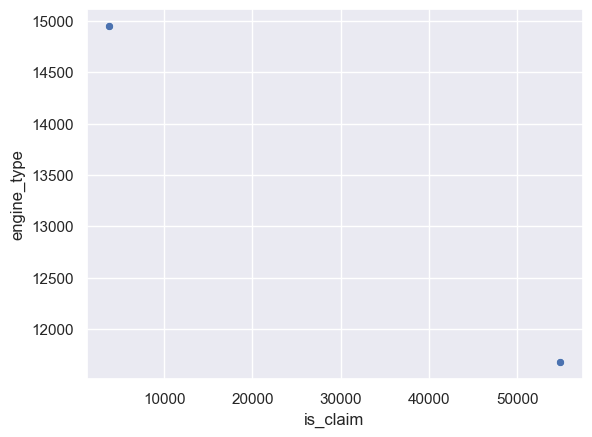

In [422]:
sns.scatterplot(x=df['is_claim'].value_counts(),y=df['engine_type'].value_counts())

<AxesSubplot:xlabel='is_claim', ylabel='engine_type'>

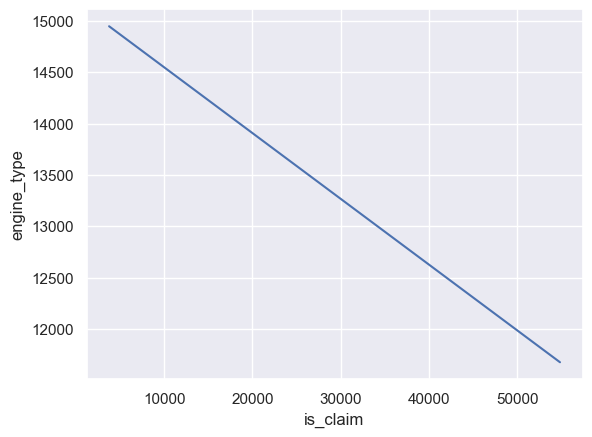

In [423]:
sns.lineplot(x=df['is_claim'].value_counts(),y=df['engine_type'].value_counts())

In [424]:
df.corr()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
policy_tenure,1.000000,0.166312,0.143676,0.111361,-0.100307,0.086101,0.066674,0.153369,-0.014211,0.088538,0.103981,0.105427,0.192941,0.094240,-0.016007,0.111614,-0.094240,0.194361,0.191185,0.107626,0.095305,0.111838,0.166426,0.190869,0.213228,0.119055,0.141027,0.189288,0.104055,0.104055,0.107545,0.184687,0.229307,0.229307,0.012695,0.191328,0.116186,0.229307,-0.010318,0.173280,0.078747,0.150604,0.019754,0.207171,-0.101081
age_of_car,0.166312,1.000000,-0.035427,0.124194,-0.062255,0.188122,0.110214,0.270275,-0.003538,0.140086,0.209073,0.225892,0.370190,0.194777,-0.023809,0.228212,-0.194777,0.393208,0.379522,0.222238,0.201579,0.189074,0.332716,0.383177,0.414104,0.259156,0.302127,0.349570,0.212699,0.212699,0.223579,0.350568,0.435211,0.435211,-0.018853,0.357716,0.194007,0.435211,-0.046551,0.348853,-0.028172,0.308669,0.017598,0.409716,-0.212649
age_of_policyholder,0.143676,-0.035427,1.000000,0.050957,0.009669,-0.031989,0.069826,0.045563,-0.020813,0.005108,-0.008041,-0.014844,0.011201,-0.002840,0.026347,-0.039199,0.002840,-0.023764,0.004183,-0.025091,-0.003115,0.009361,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,0.011219,-0.010025,-0.010025,-0.029205,0.025025,-0.038864,-0.038864,0.024265,0.010981,0.003207,-0.038864,0.001643,-0.031628,0.022435,-0.015626,0.034706,-0.011833,0.037502
area_cluster,0.111361,0.124194,0.050957,1.000000,-0.213518,0.069985,0.056991,0.134615,0.007797,0.087441,0.088479,0.087692,0.151945,0.095394,0.005787,0.077270,-0.095394,0.157066,0.153610,0.081075,0.096734,0.061291,0.136837,0.154736,0.168403,0.107398,0.131948,0.147684,0.089417,0.089417,0.081424,0.152151,0.165768,0.165768,-0.000369,0.149886,0.064011,0.165768,-0.011882,0.138312,0.010920,0.130325,0.003197,0.166655,-0.086724
population_density,-0.100307,-0.062255,0.009669,-0.213518,1.000000,-0.035125,-0.028633,-0.073965,-0.004783,-0.052383,-0.060359,-0.059533,-0.090283,-0.057928,-0.010347,-0.051064,0.057928,-0.090983,-0.091591,-0.054424,-0.056640,-0.032536,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.091856,-0.061081,-0.061081,-0.056505,-0.091824,-0.096469,-0.096469,0.001306,-0.091361,-0.038308,-0.096469,-0.004316,-0.071150,-0.017808,-0.075072,-0.000723,-0.096678,0.049189
make,0.086101,0.188122,-0.031989,0.069985,-0.035125,1.000000,-0.269687,-0.067752,0.743661,-0.124739,0.501800,0.487446,0.434879,0.609770,-0.042695,0.691456,-0.609770,0.753344,0.410672,0.466939,0.632807,-0.048132,0.753861,0.692365,0.511695,0.303274,0.481408,0.321692,0.499317,0.499317,0.689585,0.137287,0.414478,0.414478,0.097500,0.347099,-0.191371,0.414478,-0.155295,0.792254,-0.000456,0.829837,-0.772977,0.643805,-0.928112
segment,0.066674,0.110214,0.069826,0.056991,-0.028633,-0.269687,1.000000,0.654244,-0.489563,0.050693,0.032435,-0.080272,0.497186,-0.135345,0.049584,-0.225790,0.135345,0.096553,0.427622,-0.075961,-0.159362,0.619605,0.048587,0.088627,0.344738,-0.397680,0.029911,0.422011,0.012866,0.012866,-0.210449,0.523820,0.218566,0.218566,0.253973,0.400892,0.527987,0.218566,0.138149,-0.032134,0.011710,-0.036563,0.620655,0.211349,0.322243
model,0.153369,0.270275,0.045563,0.134615,-0.073965,-0.067752,0.654244,1.000000,-0.297033,0.567440,0.099699,0.043050,0.695134,0.198102,0.177240,-0.094456,-0.198102,0.435584,0.665443,-0.020178,0.183967,0.450928,0.310159,0.409819,0.625830,0.130800,0.323074,0.735543,0.090910,0.090910,-0.023364,0.781642,0.532321,0.5

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:

# Select a subset of independent variables for the pairplot
selected_columns = [ 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']
selected_df = df[selected_columns]

# Create a pairplot for the selected variables
sns.pairplot(selected_df)
plt.show()

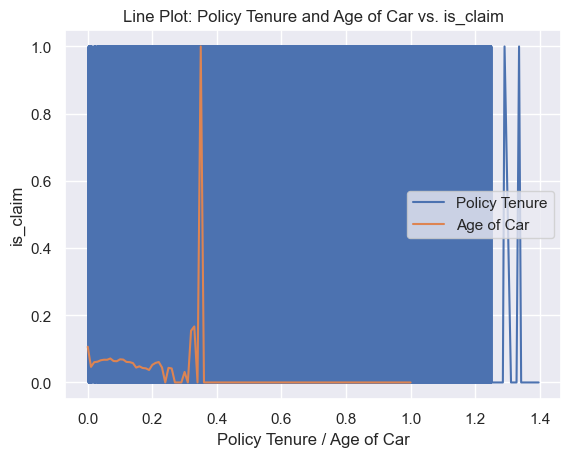

In [429]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for 'policy_tenure' and 'age_of_car' against 'is_claim'
sns.lineplot(data=df, x='policy_tenure', y='is_claim', label='Policy Tenure')
sns.lineplot(data=df, x='age_of_car', y='is_claim', label='Age of Car')

plt.xlabel('Policy Tenure / Age of Car')
plt.ylabel('is_claim')
plt.title('Line Plot: Policy Tenure and Age of Car vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()


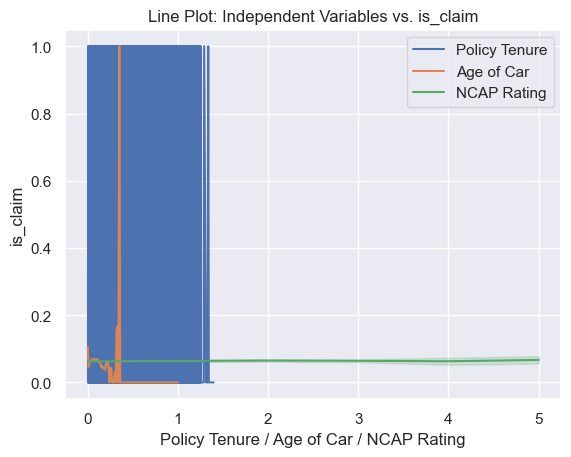

In [454]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for 'policy_tenure', 'age_of_car', 'ncap_rating', and 'population_density' against 'is_claim'
sns.lineplot(data=df, x='policy_tenure', y='is_claim', label='Policy Tenure')
sns.lineplot(data=df, x='age_of_car', y='is_claim', label='Age of Car')
sns.lineplot(data=df, x='ncap_rating', y='is_claim', label='NCAP Rating')
# sns.lineplot(data=df, x='population_density', y='is_claim', label='Population Density')

plt.xlabel('Policy Tenure / Age of Car / NCAP Rating' )
plt.ylabel('is_claim')
plt.title('Line Plot: Independent Variables vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()


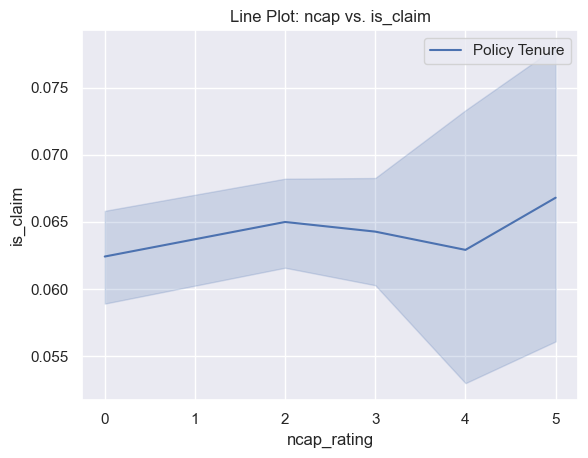

In [431]:

sns.lineplot(data=df, x='ncap_rating', y='is_claim', label='Policy Tenure')

plt.xlabel('ncap_rating')
plt.ylabel('is_claim')
plt.title('Line Plot: ncap vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

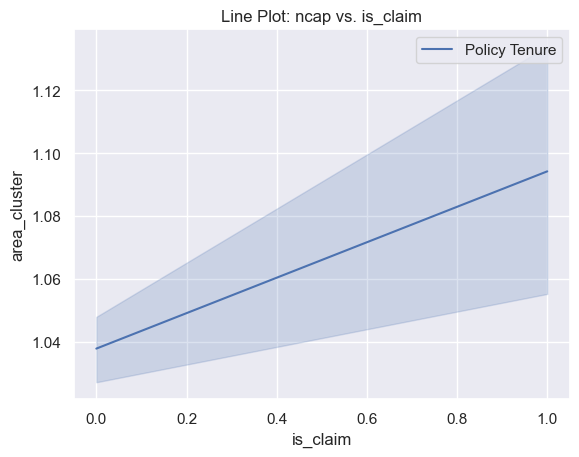

In [437]:

sns.lineplot(data=df, y='area_cluster', x='is_claim', label='Policy Tenure')

plt.ylabel('area_cluster')
plt.xlabel('is_claim')
plt.title('Line Plot: ncap vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


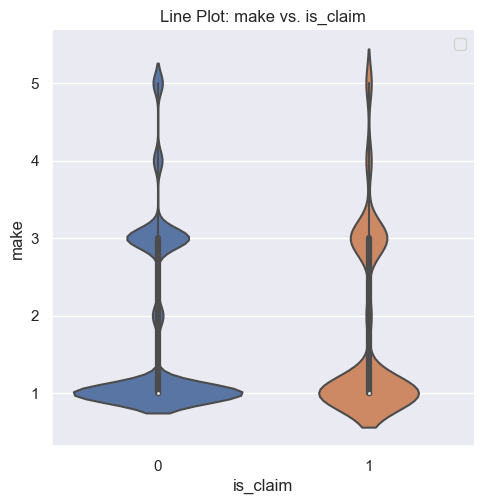

In [447]:

sns.catplot(data=df, y='make', x='is_claim',kind='violin')

plt.ylabel('make')
plt.xlabel('is_claim')
plt.title('Line Plot: make vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


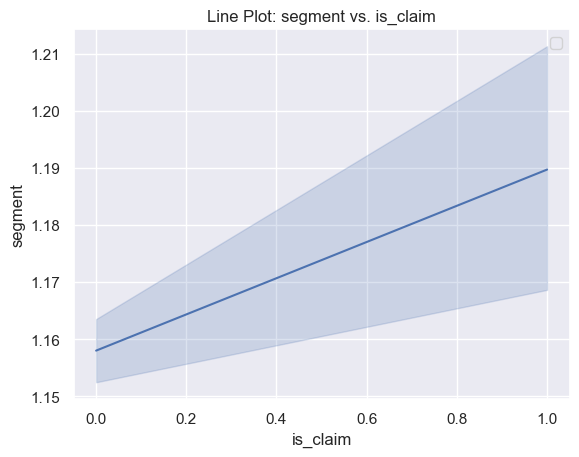

In [452]:

sns.lineplot(data=df, y='segment', x='is_claim')

plt.ylabel('segment')
plt.xlabel('is_claim')
plt.title('Line Plot: segment vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

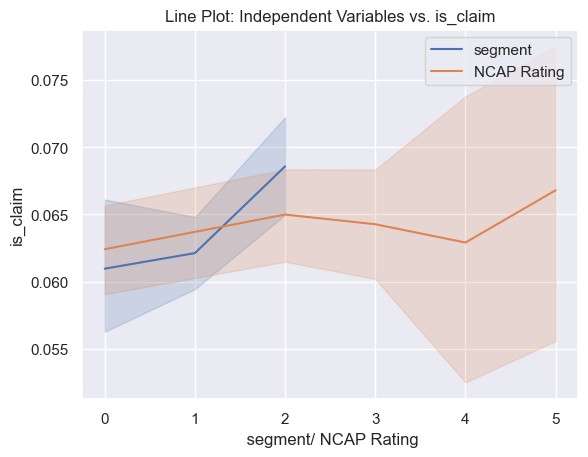

In [457]:
# Create a line plot for 'policy_tenure', 'age_of_car', 'ncap_rating', and 'population_density' against 'is_claim'
# sns.lineplot(data=df, x='model', y='is_claim', label='model')
sns.lineplot(data=df, x='segment', y='is_claim', label='segment')
sns.lineplot(data=df, x='ncap_rating', y='is_claim', label='NCAP Rating')
# sns.lineplot(data=df, x='population_density', y='is_claim', label='Population Density')

plt.xlabel(' Segment/ NCAP Rating' )
plt.ylabel('is_claim')
plt.title('Line Plot: Independent Variables vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

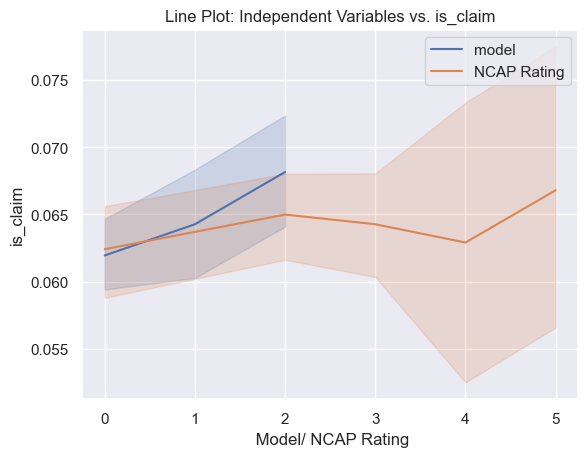

In [458]:
# Create a line plot for 'policy_tenure', 'age_of_car', 'ncap_rating', and 'population_density' against 'is_claim'
sns.lineplot(data=df, x='model', y='is_claim', label='model')
# sns.lineplot(data=df, x='segment', y='is_claim', label='segment')
sns.lineplot(data=df, x='ncap_rating', y='is_claim', label='NCAP Rating')
# sns.lineplot(data=df, x='population_density', y='is_claim', label='Population Density')

plt.xlabel(' Model/ NCAP Rating' )
plt.ylabel('is_claim')
plt.title('Line Plot: Independent Variables vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

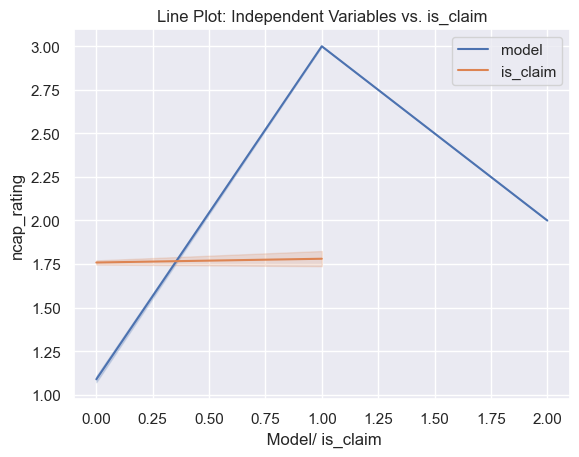

In [459]:
# Create a line plot for 'policy_tenure', 'age_of_car', 'ncap_rating', and 'population_density' against 'is_claim'
sns.lineplot(data=df, x='model', y='ncap_rating', label='model')
# sns.lineplot(data=df, x='segment', y='is_claim', label='segment')
sns.lineplot(data=df, y='ncap_rating', x='is_claim', label='is_claim')
# sns.lineplot(data=df, x='population_density', y='is_claim', label='Population Density')

plt.xlabel(' Model/ is_claim' )
plt.ylabel('ncap_rating')
plt.title('Line Plot: Independent Variables vs. is_claim')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

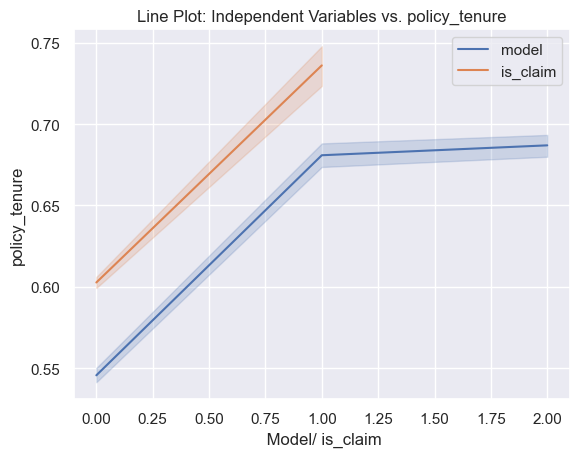

In [461]:
# Create a line plot for 'policy_tenure', 'age_of_car', 'ncap_rating', and 'population_density' against 'is_claim'
sns.lineplot(data=df, x='model', y='policy_tenure', label='model')
# sns.lineplot(data=df, x='segment', y='is_claim', label='segment')
sns.lineplot(data=df, y='policy_tenure', x='is_claim', label='is_claim')
# sns.lineplot(data=df, x='population_density', y='is_claim', label='Population Density')

plt.xlabel(' Model/ is_claim' )
plt.ylabel('policy_tenure')
plt.title('Line Plot: Independent Variables vs. policy_tenure')

# Add a legend to distinguish the lines
plt.legend()
plt.show()

<AxesSubplot:xlabel='is_claim', ylabel='airbags'>

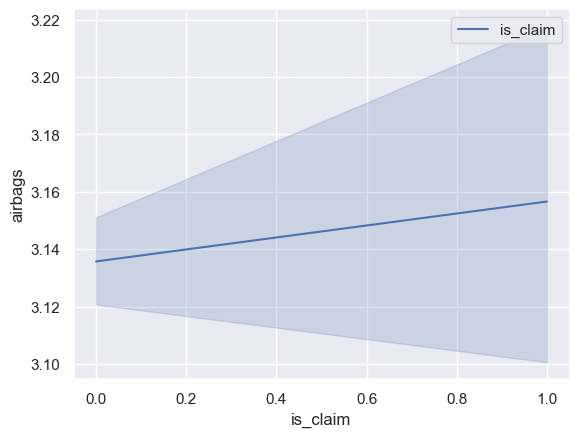

In [464]:

sns.lineplot(data=df, y='airbags', x='is_claim', label='is_claim')

<AxesSubplot:xlabel='is_claim', ylabel='rear_brakes_type'>

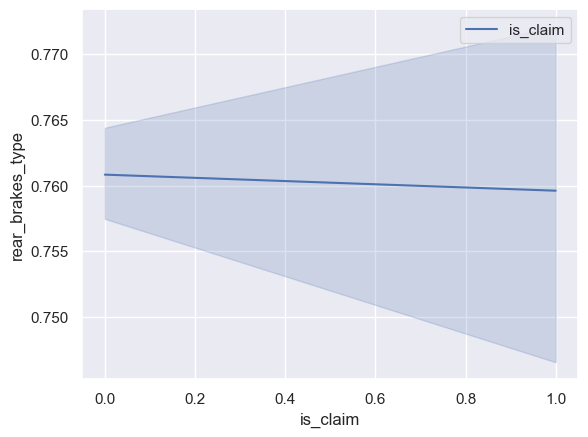

In [466]:

sns.lineplot(data=df, y='rear_brakes_type', x='is_claim', label='is_claim')

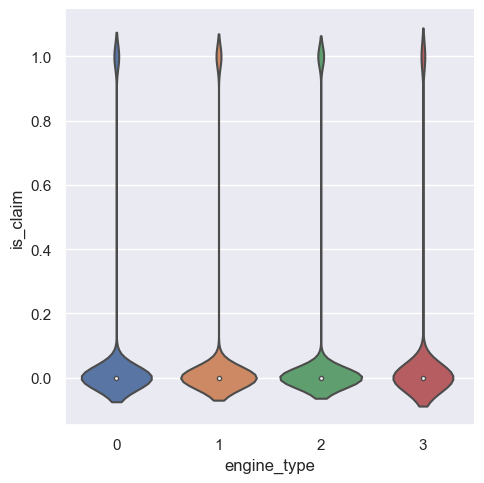

In [473]:

sns.catplot(data=df, x='engine_type', y='is_claim',kind='violin')